### - Sobhan Moradian Daghigh
#### - 11/25/2021
#### 
#### - ML - EX01 - Q1
##### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import import_ipynb
from sklearn import preprocessing

#### Reading the dataset

In [2]:
dataset = pd.read_excel('./ML-HW01/dataset2/CSM_dataset.xlsx')
dataset.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Movie                231 non-null    object 
 1   Year                 231 non-null    int64  
 2   Ratings              231 non-null    float64
 3   Genre                231 non-null    int64  
 4   Gross                231 non-null    int64  
 5   Budget               230 non-null    float64
 6   Screens              221 non-null    float64
 7   Sequel               231 non-null    int64  
 8   Sentiment            231 non-null    int64  
 9   Views                231 non-null    int64  
 10  Likes                231 non-null    int64  
 11  Dislikes             231 non-null    int64  
 12  Comments             231 non-null    int64  
 13  Aggregate Followers  196 non-null    float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.4+ KB


#### Part A:

In [4]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

#### So we have missing values for cols 'Budget', 'Screens' and 'Aggregate Followers'

#### But before trying to handle these, Im wanna see the correlation matrix to determine how to fill in the missing values.

In [5]:
dataset.corr().style.background_gradient(cmap='coolwarm')

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Year,1.000000,-0.001213,-0.026277,0.122672,0.098516,0.251472,0.103996,0.229858,0.207959,0.084561,0.234496,0.043037,-0.037351
Ratings,-0.001213,1.000000,-0.116735,0.342204,0.288157,0.057625,0.105701,0.143182,0.011710,0.073824,-0.187422,0.015679,0.078545
Genre,-0.026277,-0.116735,1.000000,-0.197009,-0.264286,-0.145807,-0.224474,-0.010831,-0.032047,-0.043544,-0.031730,-0.099919,0.008700
Gross,0.122672,0.342204,-0.197009,1.000000,0.719839,0.586447,0.423711,-0.017100,0.176363,0.110432,0.161536,0.125960,0.301808
Budget,0.098516,0.288157,-0.264286,0.719839,1.000000,0.595684,0.464733,0.033616,0.114708,0.011701,0.096888,0.090559,0.168874
Screens,0.251472,0.057625,-0.145807,0.586447,0.595684,1.000000,0.267456,-0.017046,0.256515,0.173473,0.268176,0.213039,0.210822
Sequel,0.103996,0.105701,-0.224474,0.423711,0.464733,0.267456,1.000000,-0.106769,-0.042763,-0.036089,-0.059792,-0.069333,0.228649
Sentiment,0.229858,0.143182,-0.010831,-0.017100,0.033616,-0.017046,-0.106769,1.000000,0.064134,0.053883,0.040574,0.056372,-0.092922
Views,0.207959,0.011710,-0.032047,0.176363,0.114708,0.256515,-0.042763,0.064134,1.000000,0.677175,0.776105,0.710507,0.155044
Likes,0.084561,0.073824,-0.043544,0.110432,0.011701,0.173473,-0.036089,0.053883,0.677175,1.000000,0.470645,0.917492,0.078575


#### OK lets do filling

#### Screens:

In [6]:
dataset.loc[dataset.Screens.isnull()]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
5,A Long Way Off,2014,4.6,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0
24,Camp X-Ray,2014,7.0,3,9840,1000000.0,NaN,1,3,7128,1,0,0,2182.0
32,Dracula Untold,2014,6.3,1,55900000,70000000.0,NaN,1,0,9149892,26427,1342,5278,395500.0
38,Falcon Rising,2014,5.7,1,8690,4500000.0,NaN,1,0,735551,636,98,92,1060000.0
67,Life After Beth,2014,5.7,8,8300,2400000.0,NaN,1,0,1222921,5553,193,335,1463000.0
84,Not Cool,2014,5.2,8,35700,600000.0,NaN,1,0,5403836,187162,3145,24919,2720000.0
95,Rudderless,2014,7.5,8,37400,5000000.0,NaN,1,0,827239,3221,89,432,217000.0
115,The Devil's Hand,2014,4.8,7,4240,7000000.0,NaN,1,0,330363,406,52,92,NaN
128,The Identical,2014,5.0,3,2820000,12000000.0,NaN,1,0,309610,729,97,113,275873.0
229,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [7]:
dataset['C2D_Gross'] = pd.cut(dataset.Gross, bins=[0, 30000000, 100000000, 1000000000],labels=['NotGood', 'Good', 'Awesome'])
groups = dataset.groupby(by=['C2D_Gross'])
groups.first()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
C2D_Gross,,,,,,,,,,,,,,
NotGood,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
Good,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
Awesome,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0


In [8]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.C2D_Gross == grp) & (dataset.Screens.notnull())]['Screens'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp) & (dataset.Screens.isnull()), ['Screens']] = round(mean)

In [9]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                 0
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
C2D_Gross               0
dtype: int64

#### Budget:

In [10]:
groups = dataset.groupby(by=['Genre'])
groups.first()

,Movie,Year,Ratings,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,C2D_Gross
Genre,,,,,,,,,,,,,,
1,22 Jump Street,2014,7.1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0,Awesome
2,Divergent,2014,6.8,151000000,85000000.0,3936.0,1,-4,463866,3400,152,987,1030000.0,Awesome
3,A Long Way Off,2014,4.6,29000,500000.0,1183.0,1,0,91137,112,7,1,310000.0,NotGood
4,Child 44,2015,6.4,1210000,50000000.0,66.0,1,4,3701061,9325,641,1859,NaN,NotGood
6,The Loft,2014,6.3,5980000,14000000.0,1841.0,1,2,381071,238,27,43,14586.0,NotGood
7,Locker 13,2014,4.8,2470,300000.0,3.0,1,0,30529,18,4,2,18100.0,NotGood
8,13 Sins,2014,6.3,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0,NotGood
9,Cantinflas,2014,6.7,6370000,3000000.0,382.0,1,3,2902492,9522,558,2296,13720000.0,NotGood
10,A Walk Among the Tombstones,2014,6.5,26000000,28000000.0,2714.0,1,3,2213659,2210,419,382,125646.0,NotGood


In [11]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.Genre == grp) & (dataset.Budget.notnull())]['Budget'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.Genre == grp) & (dataset.Budget.isnull()), ['Budget']] = round(mean)

In [12]:
dataset.isnull().sum()

Movie                   0
Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  0
Screens                 0
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
C2D_Gross               0
dtype: int64

#### Aggregate Followers:

In [13]:
groups = dataset.groupby(by=['C2D_Gross', 'Genre'])
groups.first()

Movie    Year  Ratings  \
C2D_Gross Genre                                                       
NotGood   1                    A Most Violent Year  2014.0      7.1   
          2                            The Admiral  2014.0      7.1   
          3                         A Long Way Off  2014.0      4.6   
          4                               Child 44  2015.0      6.4   
          6                               The Loft  2014.0      6.3   
          7                              Locker 13  2014.0      4.8   
          8                                13 Sins  2014.0      6.3   
          9                             Cantinflas  2014.0      6.7   
          10           A Walk Among the Tombstones  2014.0      6.5   
          12                                   NaN     NaN      NaN   
          15                           Devil's Due  2014.0      4.0   
Good      1                         3 Days to Kill  2014.0      6.2   
          2                          Earth to Echo  2014.0      5.8   
          3                         Dolphin Tale 2  2014.0      6.4   
          4                                    NaN     NaN      NaN   
          6                      The Boy Next Door  2015.0      4.6   
          7                                    NaN     NaN      NaN   
          8      A Million Ways to Die in the West  2014.0      6.1   
          9                            Jersey Boys  2014.0      6.9   
          10                  Deliver Us from Evil  2014.0      6.2   
          12                Penguins of Madagascar  2014.0      6.8   
          15                             Annabelle  2014.0      5.4   
Awesome   1                         22 Jump Street  2014.0      7.1   
          2                              Divergent  2014.0      6.8   
          3                              Gone Girl  2014.0      8.2   
          4                                    NaN     NaN      NaN   
          6                                    NaN     NaN      NaN   
          7                                    NaN     NaN      NaN   
          8                              Neighbors  2014.0      6.4   
          9                               Unbroken  2014.0      7.2   
          10                                   NaN     NaN      NaN   
          12                            Big Hero 6  2014.0      7.9   
          15                                   NaN     NaN      NaN   

                       Gross       Budget  Screens  Sequel  Sentiment  \
C2D_Gross Genre                                                         
NotGood   1        5750000.0   20000000.0    818.0     1.0        2.0   
          2        2590000.0    9500000.0   1586.0     1.0        3.0   
          3          29000.0     500000.0   1183.0     1.0        0.0   
          4        1210000.0   50000000.0     66.0     1.0        4.0   
          6        5980000.0   14000000.0   1841.0     1.0        2.0   
          7           2470.0     300000.0      3.0     1.0        0.0   
          8           9130.0    4000000.0     45.0     1.0        0.0   
          9        6370000.0    3000000.0    382.0     1.0        3.0   
          10      26000000.0   28000000.0   2714.0     1.0        3.0   
          12             NaN          NaN      NaN     NaN        NaN   
          15      15800000.0    7000000.0   2544.0     1.0        0.0   
Good      1       30700000.0   28000000.0   2872.0     1.0        0.0   
          2       38900000.0   13000000.0   3230.0     1.0        0.0   
          3       42000000.0   36000000.0   3376.0     2.0       -1.0   
          4              NaN          NaN      NaN     NaN        NaN   
          6       35400000.0    4000000.0   2602.0     1.0       16.0   
          7              NaN          NaN      NaN     NaN        NaN   
          8       42600000.0   40000000.0   3158.0     1.0        0.0   
          9       47000000.0   40000000.0   2905.0     1.0       10.0   
          10      30500000

In [14]:
for grp, pdf in groups:
    lst = dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.Genre == grp[1]) & (dataset.loc[:, 'Aggregate Followers'].notnull())]['Aggregate Followers'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.Genre == grp[1]) & (dataset.loc[:, 'Aggregate Followers'].isnull()), ['Aggregate Followers']] = round(mean)
        
    lst = dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.loc[:, 'Aggregate Followers'].notnull())]['Aggregate Followers'].tolist()
    if lst:
        mean = np.mean(lst)
        dataset.loc[(dataset.C2D_Gross == grp[0]) & (dataset.loc[:, 'Aggregate Followers'].isnull()), ['Aggregate Followers']] = round(mean)

In [15]:
dataset.pop('C2D_Gross')
dataset.isnull().sum()

Movie                  0
Year                   0
Ratings                0
Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
dtype: int64

#### All the missing values handled.

#### Part B:

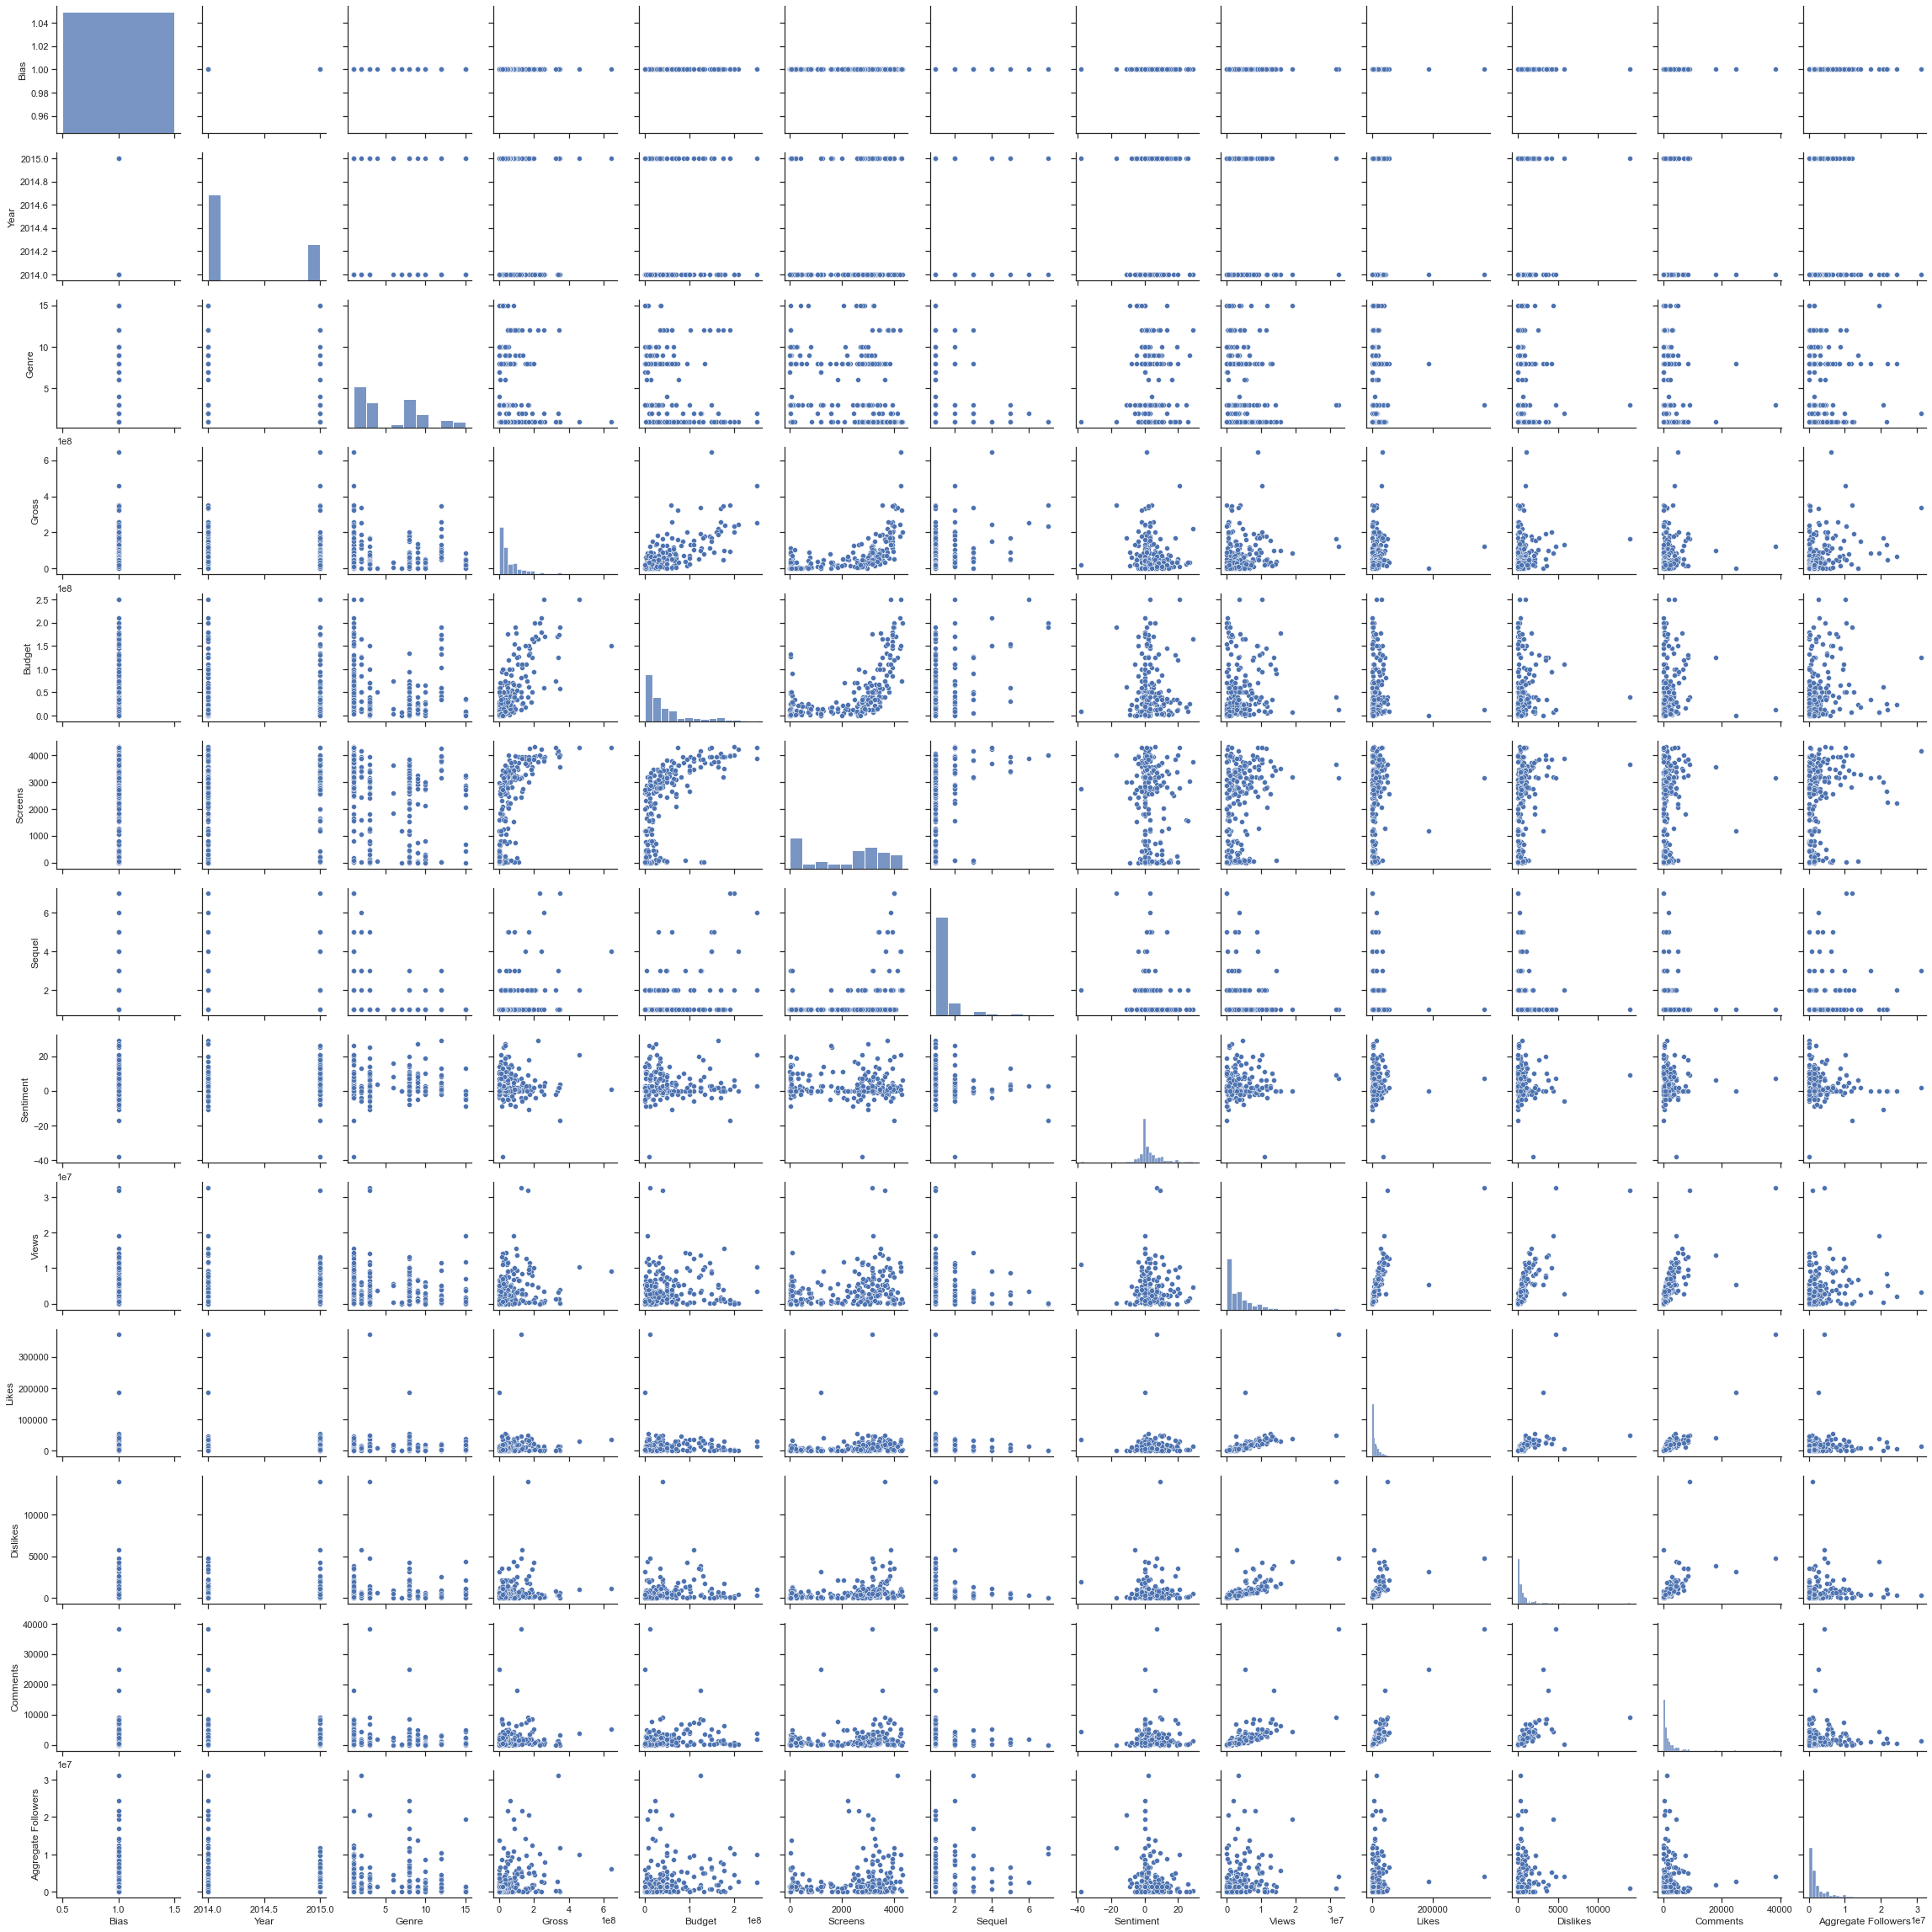

In [40]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(dataset)
plt.show()

#### Part D:

In [18]:
import Ex01_Q1 as Q1

In [19]:
rates = dataset.pop('Ratings')
dataset.insert(loc=1, column='Bias', value=[1] * dataset.shape[0])

#### Scale

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset.iloc[:, 2:].values)
scaled_dataset = pd.DataFrame(x_scaled, columns=['Year','Genre', 'Gross', 'Budget', 'Screens', 'Sequel', 'Sentiment', 'Views', 'Likes', 'Dislikes', 'Comments', 'Aggregate Followers'])
scaled_dataset.insert(loc=0, column='Movie', value=dataset.iloc[:, 0])
scaled_dataset.insert(loc=1, column='Bias', value=dataset.iloc[:, 1])
scaled_dataset['Ratings'] = rates
scaled_dataset

,Movie,Bias,Year,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Ratings
0,13 Sins,1,0.0,0.500000,0.000010,0.015724,0.009949,0.000000,0.567164,0.100528,0.012498,0.030444,0.016578,0.036061,6.3
1,22 Jump Street,1,0.0,0.000000,0.298598,0.199776,0.764461,0.166667,0.597015,0.017857,0.009348,0.004370,0.004848,0.397981,7.1
2,3 Days to Kill,1,0.0,0.000000,0.047741,0.111751,0.664044,0.000000,0.567164,0.009323,0.000882,0.002436,0.001225,0.015532,6.2
3,300: Rise of an Empire,1,0.0,0.000000,0.164849,0.439843,0.802406,0.166667,0.567164,0.013861,0.006552,0.009456,0.015379,0.018271,6.3
4,A Haunted House 2,1,0.0,0.500000,0.026901,0.013724,0.534012,0.166667,0.567164,0.096391,0.032821,0.043696,0.028204,0.061966,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Child 44,1,1.0,0.214286,0.001878,0.199776,0.014808,0.000000,0.626866,0.113417,0.025163,0.045917,0.048458,0.045604,6.4
227,Aloha,1,1.0,1.000000,0.032656,0.147761,0.650856,0.000000,0.761194,0.218192,0.050741,0.080802,0.059693,0.045604,5.5
228,Unfinished Business,1,1.0,0.500000,0.015859,0.139759,0.642064,0.000000,0.671642,0.105741,0.018410,0.023281,0.010661,0.045604,5.4
229,War Room,1,1.0,0.000000,0.019125,0.011723,0.273253,0.000000,0.716418,0.002028,0.001077,0.004799,0.005239,0.046889,5.4


#### Split data into 80% of train and 20% of test.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(scaled_dataset.iloc[:,:-1], scaled_dataset.iloc[:, -1], train_size=0.8, shuffle=True)

In [22]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [23]:
train.head()

,Movie,Bias,Year,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,Ratings
140,The Other Woman,1,0.0,0.5,0.130479,0.159765,0.741092,0.000000,0.552239,0.259893,0.094643,0.159957,0.090686,0.087980,6.0
224,Run All Night,1,1.0,0.5,0.041054,0.199776,0.733225,0.000000,0.611940,0.173820,0.027181,0.034384,0.044626,0.045604,6.6
160,Wish I Was Here,1,0.0,0.5,0.005579,0.023727,0.015271,0.000000,0.567164,0.026512,0.003708,0.005659,0.001746,0.058581,6.7
185,Magic Mike XXL,1,1.0,0.5,0.102485,0.058937,0.775798,0.166667,0.671642,0.157162,0.049855,0.061461,0.041159,0.270423,6.2
83,Non-Stop,1,0.0,0.0,0.142143,0.199776,0.714484,0.000000,0.567164,0.011244,0.001886,0.001361,0.000964,0.020875,7.0


In [36]:
# Data count
m = train.shape[0]

degree = 12
epoch = 10000

coeffs, _ = Q1.gd(epoch=epoch, degree=degree, df_train=train.iloc[:, 1:], df_test=test.iloc[:, 1:], size=m, report=False)
train_pred = Q1.predY_cal(coeffs, train.iloc[:, 1:], degree=degree)
test_pred = Q1.predY_cal(coeffs, test.iloc[:, 1:], degree=degree)

tr_RMSE = mean_squared_error(train.iloc[:, -1], train_pred, squared=False)
ts_RMSE = mean_squared_error(test.iloc[:, -1], test_pred, squared=False)

print('Train RMSE: {:.2f} , Test RMSE: {:.2f}'.format(tr_RMSE, ts_RMSE))        

Train RMSE: 0.98 , Test RMSE: 1.05


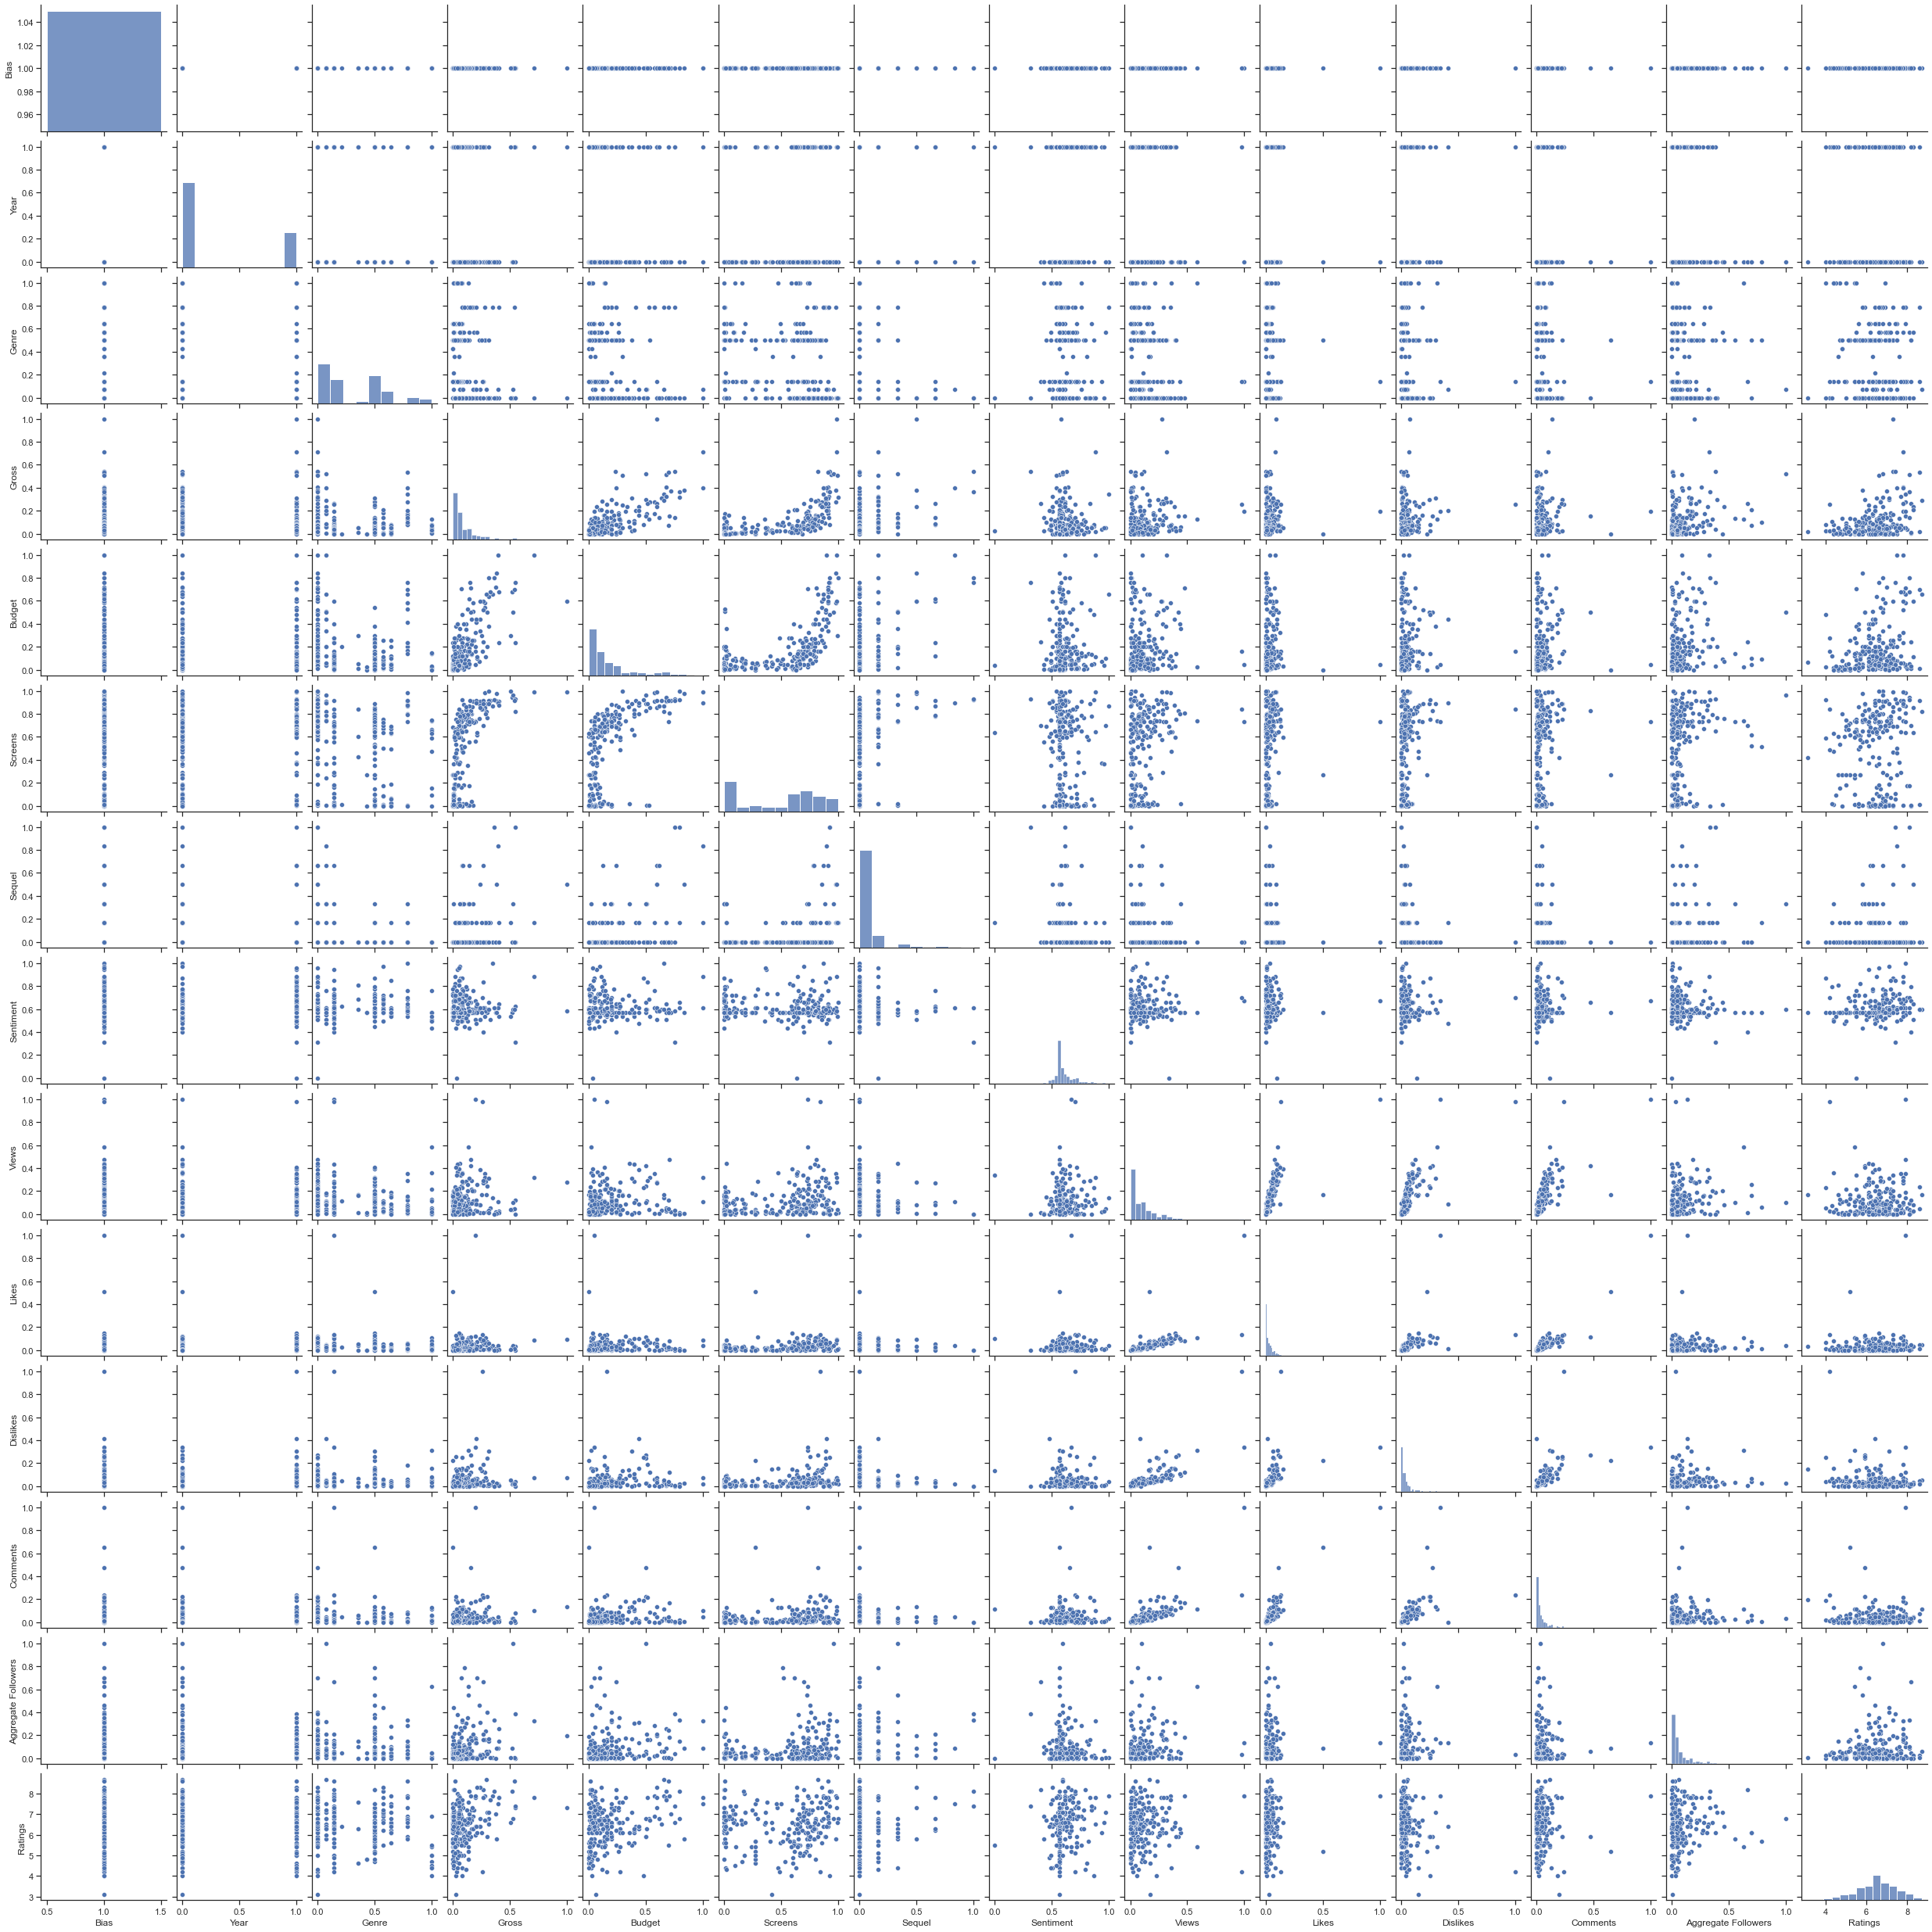

In [39]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(scaled_dataset)
plt.show()